In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../')

from src.emotion.analysis.data_preprocessing import (
    DataPreprocessor,
    LinearInterpolator,
    RollingAverageSmoother,
)

%matplotlib inline

In [2]:
folder = '/home/moritz/Workspace/masterthesis/data/identities/'
df = pd.read_csv(folder + 'team_20/2023-01-10/team_20_2023-01-10.csv')

In [3]:
preprocessing_pipeline = [
    LinearInterpolator(),
    RollingAverageSmoother(
        window_size=125,
        cols=["Brightness"],
    ),
]

preprocessor = DataPreprocessor(preprocessing_pipeline)
pre_df = preprocessor.preprocess_data(df)

pre_df.head(10)

,Frame,Confidence,x_center,y_center,Angry,Disgust,Happy,Sad,Surprise,Fear,Neutral,Brightness,ClassID
0,0,0.799670,1092.678223,632.916748,0.002967,0.017306,0.320276,0.019811,0.203477,0.009455,0.426707,140.360830,person_id1
1,1,0.800715,1092.737183,633.014722,0.003045,0.019074,0.350205,0.020240,0.187026,0.009942,0.410468,140.361000,person_id1
2,2,0.801760,1092.796143,633.112695,0.003123,0.020842,0.380134,0.020668,0.170575,0.010429,0.394229,140.361032,person_id1
3,3,0.802805,1092.855103,633.210669,0.003201,0.022610,0.410063,0.021096,0.154124,0.010916,0.377990,140.360931,person_id1
4,4,0.803851,1092.914062,633.308643,0.003279,0.024378,0.439992,0.021524,0.137674,0.011403,0.361751,140.360809,person_id1
5,5,0.804896,1092.973022,633.406616,0.003357,0.026146,0.469920,0.021953,0.121223,0.011890,0.345511,140.360667,person_id1
6,6,0.805047,1092.958374,633.424023,0.003176,0.022603,0.431137,0.019996,0.130393,0.010949,0.381746,140.360505,person_id1
7,7,0.805199,1092.943726,633.441431,0.002995,0.019060,0.392353,0.018040,0.139563,0.010008,0.417981,140.360324,person_id1
8,8,0.805350,1092.929077,633.458838,0.002814,0.015517,0.353570,0.016084,0.148734,0.009067,0.454215,140.360126,person_id1
9,9,0.805501,1092.914429,633.476245,0.002633,0.011974,0.314786,0.014127,0.157904,0.008126,0.490450,140.359872,person_id1


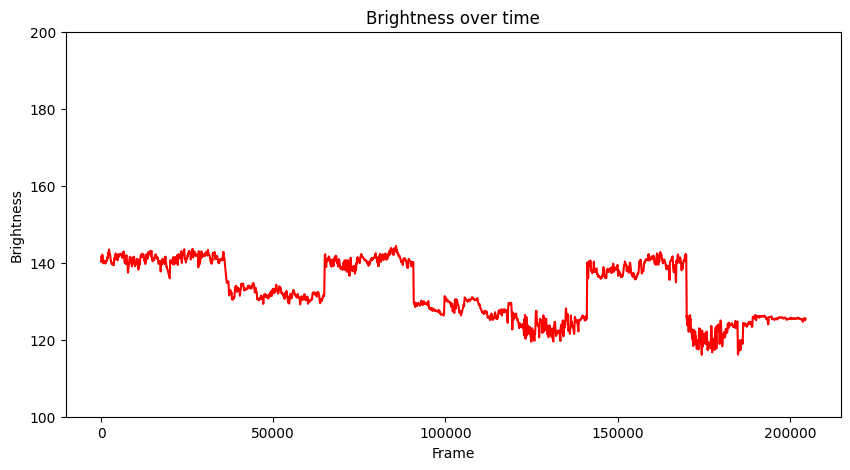

In [4]:
person_df = pre_df[pre_df["ClassID"] == "person_id1"]

# create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# plot the Brightness column for person_id1 using sns.lineplot()
sns.lineplot(x="Frame", y="Brightness", data=person_df, color="red")

# set the title, x-label, y-label, and y-limits of the plot
ax.set_title("Brightness over time")
ax.set_xlabel("Frame")
ax.set_ylabel("Brightness")
ax.set_ylim(100, 200)

plt.show()

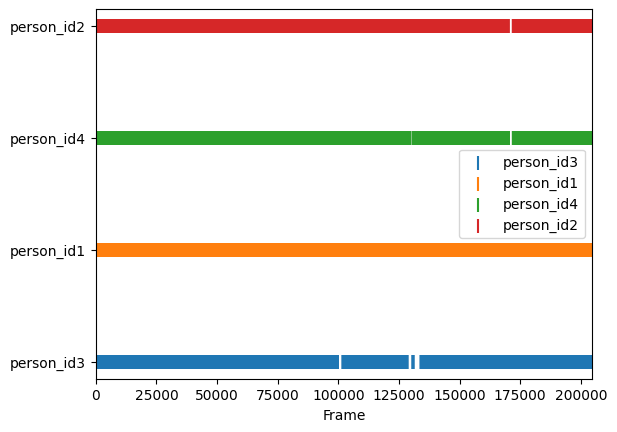

In [5]:
# get the unique ClassIDs
class_ids = df['ClassID'].unique()

# create a figure and axis object
fig, ax = plt.subplots()

# plot the presence of each ClassID in each frame
for i, class_id in enumerate(class_ids):
    is_present = df['ClassID'] == class_id
    ax.scatter(df[is_present]['Frame'], [i] * len(df[is_present]), marker='|', s=100, label=class_id)

# set the y-axis ticks and labels
ax.set_yticks(range(len(class_ids)))
ax.set_yticklabels(class_ids)

# set the x-axis label and limits
ax.set_xlabel('Frame')
ax.set_xlim(0, df['Frame'].max() + 1)

# show the legend and plot
ax.legend()
plt.show()

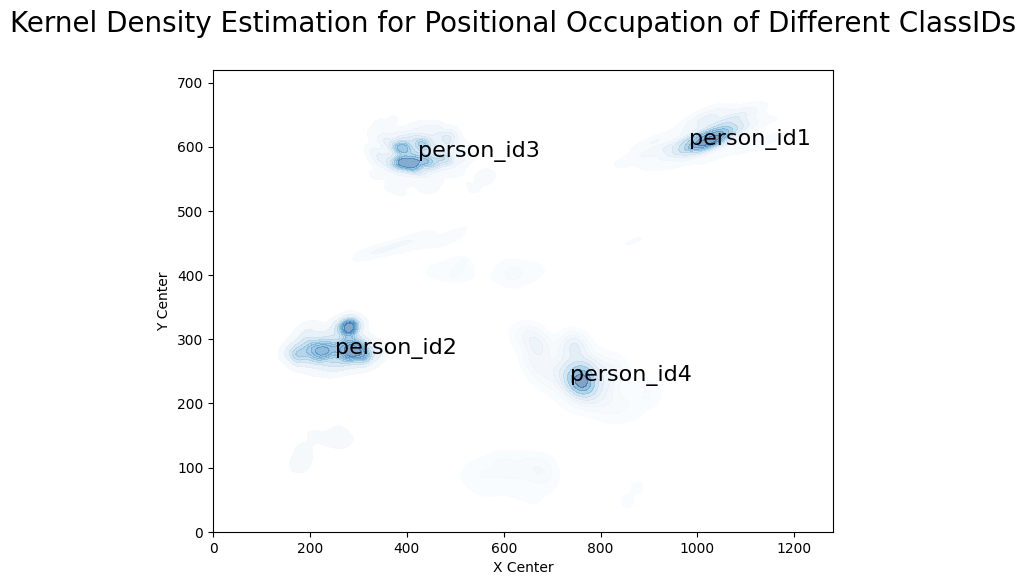

In [16]:
# Note, that this takes 1-2min (depending on file size)!!!
df["y_center"] = -df["y_center"] + 720

# Plot the KDEs in a single plot
fig, ax = plt.subplots(figsize=(8, 6))

for class_id in df["ClassID"].unique():
    sns.kdeplot(
        ax=ax,
        data=df[df["ClassID"] == class_id],
        x="x_center",
        y="y_center",
        cmap="Blues",
        alpha=0.5,
        thresh=0.05,
        fill=True,
    )
    ax.text(
        x=df[df["ClassID"] == class_id]["x_center"].mean(),
        y=df[df["ClassID"] == class_id]["y_center"].mean(),
        s=class_id,
        fontsize=16,
    )

fig.suptitle(
    "Kernel Density Estimation for Positional Occupation of Different ClassIDs",
    fontsize=20,
)
ax.set_xlabel("X Center")
ax.set_ylabel("Y Center")
ax.set_xlim(0, 1280)
ax.set_ylim(0, 720)

plt.show()